# Random Forest Classifier using Wi-Fi and Bluetooth data

### Experiments which aims to explore the ML algorithm Random Forest as a Classifier algorithm using the Wi-Fi and BLE technologies moreover using the strength of the signal as a basis.

## Imports
Imports of the libraries to be used throughout the experiments

In [1]:
#CSV Related
import pandas as pd
import csv

# Machine Learning
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import make_pipeline
import sklearn
import scipy

#Graphical Display
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()
from pandas.plotting import scatter_matrix

plt.style.use('seaborn-whitegrid')

#Additional Helper Libraries
from operator import itemgetter
import re

<Figure size 432x288 with 0 Axes>

### Load File
Function that allows to load a file from disk

In [2]:
#Function that reads a csv file and structures the data accordingly
def load_file(filename):
    dataset = pd.read_csv(filename)
    return dataset

### Replace 0 with Nan RSSI Values

In [3]:
def replace_features_nan(dataset):
    dataset.iloc[:,4:] = dataset.iloc[:,4:].replace(0,np.nan)
    return dataset

### Initialize Dataset

In [4]:
dataset = load_file('../radiomapBluetoothWiFiclassifier_university_dataset.csv')
dataset = replace_features_nan(dataset)
display(dataset)
display(dataset.shape)

,Fingerprint ID,coordinate_X,coordinate_Y,zone,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,265,1.0,3.0,Personal,-62.0,-65.0,-63.0,-76.0,-78.0,-79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.0,-88.0,-96
1,266,1.0,3.0,Personal,-62.0,-61.0,-62.0,-77.0,-78.0,-78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,-88.0,-96
2,267,1.0,3.0,Personal,-63.0,-62.0,-62.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-94.0,-92.0,-98
3,268,1.0,3.0,Personal,-63.0,-61.0,-63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-92.0,-89.0,-96
4,269,1.0,3.0,Personal,-63.0,-61.0,-63.0,-76.0,-78.0,-78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1022,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-90.0,-89.0,NaN,NaN,NaN,-90.0,-95.0,-84.0,-95
746,1023,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-88.0,NaN,NaN,NaN,NaN,-90.0,-94.0,-83.0,-92
747,1024,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-89.0,-90.0,NaN,NaN,NaN,-90.0,-92.0,-84.0,-91
748,1025,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-91.0,-89.0,NaN,NaN,NaN,NaN,-93.0,-84.0,-93


(750, 37)

### Dataset Overall Info

In [5]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fingerprint ID     750 non-null    int64  
 1   coordinate_X       750 non-null    float64
 2   coordinate_Y       750 non-null    float64
 3   zone               750 non-null    object 
 4   f0:5c:19:94:1a:40  630 non-null    float64
 5   f0:5c:19:94:1a:41  634 non-null    float64
 6   f0:5c:19:94:1a:42  635 non-null    float64
 7   34:fc:b9:18:e4:c1  189 non-null    float64
 8   34:fc:b9:18:e4:c0  145 non-null    float64
 9   34:fc:b9:18:e4:c2  178 non-null    float64
 10  f0:5c:19:94:1a:50  664 non-null    float64
 11  f0:5c:19:94:1a:51  699 non-null    float64
 12  f0:5c:19:94:1a:52  738 non-null    float64
 13  4c:ed:fb:5a:5c:0c  712 non-null    float64
 14  4c:ed:fb:5a:5c:08  682 non-null    float64
 15  f0:5c:19:94:19:e1  343 non-null    float64
 16  f0:5c:19:94:19:e2  280 non

None

### File Overall Description
Usage of describe pandas function on the dataset

In [6]:
display(dataset.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Fingerprint ID,750.0,639.980000,217.460567,265.0,452.25,639.5,826.75,1026.0
coordinate_X,750.0,0.000000,1.415157,-2.0,-1.00,0.0,1.00,2.0
coordinate_Y,750.0,1.000000,1.415157,-1.0,0.00,1.0,2.00,3.0
f0:5c:19:94:1a:40,630.0,-65.284127,3.983300,-76.0,-68.00,-65.0,-62.00,-56.0
f0:5c:19:94:1a:41,634.0,-63.529968,3.464086,-71.0,-66.00,-64.0,-62.00,-48.0
f0:5c:19:94:1a:42,635.0,-64.628346,3.965205,-76.0,-68.00,-64.0,-61.00,-56.0
34:fc:b9:18:e4:c1,189.0,-78.380952,3.702049,-86.0,-81.00,-78.0,-76.00,-70.0
34:fc:b9:18:e4:c0,145.0,-80.255172,4.808527,-92.0,-84.00,-79.0,-77.00,-71.0
34:fc:b9:18:e4:c2,178.0,-81.410112,4.828740,-92.0,-86.00,-81.0,-78.00,-70.0
f0:5c:19:94:1a:50,664.0,-78.664157,3.975435,-89.0,-81.25,-79.0,-76.00,-69.0


### % of Missing Values

In [7]:
def compute_missing_values(dataset): 
    missing_values = dataset.isnull().sum()
    missing_dataset = pd.DataFrame(missing_values,columns=['Missing Values'])
    display(missing_dataset)

In [8]:
compute_missing_values(dataset)

,Missing Values
Fingerprint ID,0
coordinate_X,0
coordinate_Y,0
zone,0
f0:5c:19:94:1a:40,120
f0:5c:19:94:1a:41,116
f0:5c:19:94:1a:42,115
34:fc:b9:18:e4:c1,561
34:fc:b9:18:e4:c0,605
34:fc:b9:18:e4:c2,572


### Overall Histogram of dataset atributes

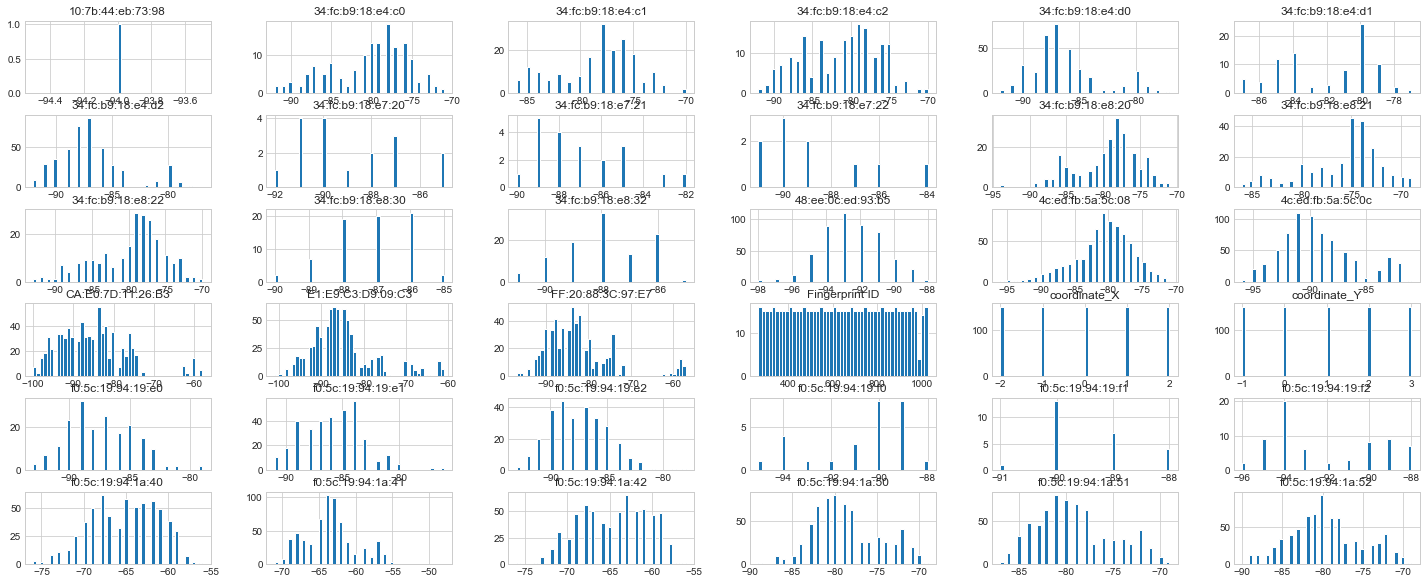

In [9]:
dataset.hist(bins=50,figsize=(25,10))
plt.show()

### Target Attribute - Zone
Graphical display of the zones scanned in the experiment

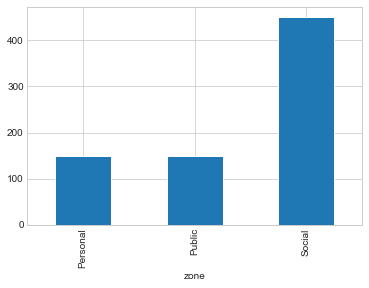

In [10]:
reference_points = dataset.groupby(['zone'])
reference_points.size().plot(kind="bar")

### Access Points Graphical Display

<BarContainer object of 30 artists>

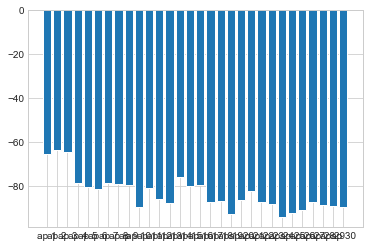

In [11]:
count_aps = {}
counter = 1
first_beacon_index = -1
for ap in dataset.iloc[:,4:]:
    if ap.islower() == False:
        first_beacon_index = list(dataset.iloc[:,4:]).index(ap)
        break
    mean_value = dataset[ap].mean()
    count_aps['ap ' + str(counter)] = mean_value
    counter = counter + 1
plt.bar(range(len(count_aps)),list(count_aps.values()),align='center',tick_label=list(count_aps.keys()))

### Beacons Graphical Display
Graphical display with the average strength signal transmitted by each beacon

<BarContainer object of 3 artists>

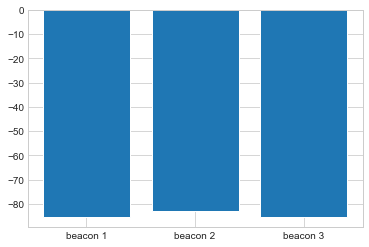

In [12]:
count_beacons = {}
counter = 1
beacons = dataset.iloc[:,4:].iloc[:,first_beacon_index:]
for beacon in beacons:
    mean_value = dataset[beacon].mean()
    count_beacons['beacon ' + str(counter)] = mean_value
    counter = counter + 1
plt.bar(range(len(count_beacons)),list(count_beacons.values()),align='center',tick_label=list(count_beacons.keys()))

## Signal Strength Distribution Display
Graphical display of the distribution of the signal strength

### Wifi Signal Strength

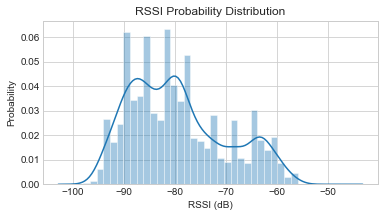

In [13]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Probability Distribution')

sns.distplot(dataset.iloc[:,4:].iloc[:,:first_beacon_index])
# The X Label
plt.xlabel('RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

### Bluetooth Signal Strength

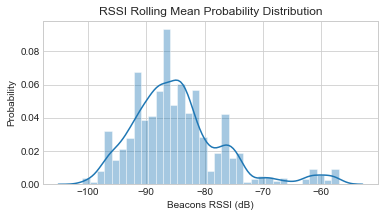

In [14]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Rolling Mean Probability Distribution')
# The KDE plot for the Rolling Mean column
sns.distplot(dataset.iloc[:,4:].iloc[:,first_beacon_index:])
# The X Label
plt.xlabel('Beacons RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

### Correlations
Check how much each attribute collerates with each other. Values range from -1 to 1. Close to 1 means a strong positive correlation.

In [15]:
def compute_correlations(dataset):
    corr_matrix = dataset.corr()
    display(corr_matrix)

In [16]:
compute_correlations(dataset)

,Fingerprint ID,coordinate_X,coordinate_Y,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
Fingerprint ID,1.000000,0.366251,-0.566946,0.032462,0.242338,0.033822,-0.139389,-0.117810,-0.001366,0.508888,...,NaN,0.748611,0.837234,-0.071316,-0.227020,-0.675707,-0.133456,0.109751,-0.202906,0.301147
coordinate_X,0.366251,1.000000,0.000000,0.280135,0.416280,0.287384,0.064912,0.171978,0.200114,0.225635,...,NaN,NaN,NaN,-0.623570,-0.854697,-0.919701,NaN,-0.558757,-0.413933,0.148591
coordinate_Y,-0.566946,0.000000,1.000000,0.053322,-0.071948,0.053766,0.137335,0.016277,-0.044580,-0.062025,...,NaN,0.832861,0.857329,-0.333712,-0.592749,-0.812240,NaN,-0.425166,0.318924,-0.666386
f0:5c:19:94:1a:40,0.032462,0.280135,0.053322,1.000000,0.588375,0.899034,-0.118245,-0.239832,-0.170579,0.047614,...,NaN,0.161779,0.918629,-0.361584,-0.784437,-0.523133,NaN,-0.218615,-0.134458,-0.090940
f0:5c:19:94:1a:41,0.242338,0.416280,-0.071948,0.588375,1.000000,0.617635,0.056372,-0.085792,0.000745,0.185243,...,NaN,0.344661,0.904578,-0.104510,-0.562859,-0.598961,NaN,-0.189281,-0.264925,0.156153
f0:5c:19:94:1a:42,0.033822,0.287384,0.053766,0.899034,0.617635,1.000000,-0.096208,-0.213136,-0.180547,0.080835,...,NaN,0.110221,0.866643,-0.401765,-0.649519,-0.564232,NaN,-0.213185,-0.146619,-0.086660
34:fc:b9:18:e4:c1,-0.139389,0.064912,0.137335,-0.118245,0.056372,-0.096208,1.000000,0.879276,0.859055,0.431713,...,NaN,-0.130152,0.500000,-0.693375,-0.693375,-0.993399,NaN,-0.286732,0.063276,0.238843
34:fc:b9:18:e4:c0,-0.117810,0.171978,0.016277,-0.239832,-0.085792,-0.213136,0.879276,1.000000,0.966363,0.263773,...,NaN,-0.484034,0.000000,NaN,NaN,-1.000000,-1.000000,-0.248865,-0.227294,0.249093
34:fc:b9:18:e4:c2,-0.001366,0.200114,-0.044580,-0.170579,0.000745,-0.180547,0.859055,0.966363,1.000000,0.353474,...,NaN,-0.348230,0.277350,NaN,NaN,-1.000000,NaN,-0.217113,-0.131575,0.310376
f0:5c:19:94:1a:50,0.508888,0.225635,-0.062025,0.047614,0.185243,0.080835,0.431713,0.263773,0.353474,1.000000,...,NaN,0.676457,0.766638,-0.859702,-0.795020,-0.881834,0.150109,-0.088686,-0.222276,-0.053498


### Data cleaning
Fill in missing values and fix/remove outliers

In [17]:
def compute_data_cleaning(dataset,feature):
    nan_filler = dataset[feature].min()*1.010
    dataset[feature] = dataset[feature].fillna(nan_filler) # Fill missing values

In [18]:
for x in dataset.iloc[:,4:]:
    display(x)
    compute_data_cleaning(dataset,x)
display(dataset)

'f0:5c:19:94:1a:40'

'f0:5c:19:94:1a:41'

'f0:5c:19:94:1a:42'

'34:fc:b9:18:e4:c1'

'34:fc:b9:18:e4:c0'

'34:fc:b9:18:e4:c2'

'f0:5c:19:94:1a:50'

'f0:5c:19:94:1a:51'

'f0:5c:19:94:1a:52'

'4c:ed:fb:5a:5c:0c'

'4c:ed:fb:5a:5c:08'

'f0:5c:19:94:19:e1'

'f0:5c:19:94:19:e2'

'34:fc:b9:18:e8:21'

'34:fc:b9:18:e8:22'

'34:fc:b9:18:e8:20'

'f0:5c:19:94:19:e0'

'34:fc:b9:18:e4:d2'

'48:ee:0c:ed:93:b5'

'34:fc:b9:18:e4:d0'

'34:fc:b9:18:e4:d1'

'34:fc:b9:18:e8:30'

'34:fc:b9:18:e8:32'

'10:7b:44:eb:73:98'

'f0:5c:19:94:19:f2'

'f0:5c:19:94:19:f0'

'34:fc:b9:18:e7:21'

'34:fc:b9:18:e7:22'

'34:fc:b9:18:e7:20'

'f0:5c:19:94:19:f1'

'E1:E9:C3:D9:09:C3'

'FF:20:88:3C:97:E7'

'CA:E0:7D:11:26:B3'

,Fingerprint ID,coordinate_X,coordinate_Y,zone,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,265,1.0,3.0,Personal,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-86.0,-88.0,-96
1,266,1.0,3.0,Personal,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-96.0,-88.0,-96
2,267,1.0,3.0,Personal,-63.00,-62.00,-62.00,-86.86,-92.92,-92.92,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-94.0,-92.0,-98
3,268,1.0,3.0,Personal,-63.00,-61.00,-63.00,-86.86,-92.92,-92.92,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-92.0,-89.0,-96
4,269,1.0,3.0,Personal,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1022,2.0,3.0,Personal,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,...,-94.94,-90.00,-89.00,-90.9,-91.91,-92.92,-90.00,-95.0,-84.0,-95
746,1023,2.0,3.0,Personal,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,...,-94.94,-88.00,-95.95,-90.9,-91.91,-92.92,-90.00,-94.0,-83.0,-92
747,1024,2.0,3.0,Personal,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,...,-94.94,-89.00,-90.00,-90.9,-91.91,-92.92,-90.00,-92.0,-84.0,-91
748,1025,2.0,3.0,Personal,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,...,-94.94,-91.00,-89.00,-90.9,-91.91,-92.92,-91.91,-93.0,-84.0,-93


### Initialize Training Data
Training Data intialization for predictions purposes

In [19]:
train_wifi = dataset.iloc[:,4:first_beacon_index]
display(train_wifi)
display(train_wifi.shape)

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,f0:5c:19:94:19:e0,34:fc:b9:18:e4:d2,48:ee:0c:ed:93:b5,34:fc:b9:18:e4:d0,34:fc:b9:18:e4:d1,34:fc:b9:18:e8:30,34:fc:b9:18:e8:32,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0
0,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,-80.0,-80.0,-80.0,-89.0,...,-93.93,-92.92,-98.98,-92.92,-87.87,-90.9,-91.91,-94.94,-96.96,-95.95
1,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,-80.0,-81.0,-80.0,-90.0,...,-93.93,-92.92,-98.98,-92.92,-87.87,-90.9,-91.91,-94.94,-96.96,-95.95
2,-63.00,-62.00,-62.00,-86.86,-92.92,-92.92,-80.0,-79.0,-80.0,-90.0,...,-87.00,-92.92,-98.98,-92.92,-87.87,-90.9,-91.91,-94.94,-96.96,-95.95
3,-63.00,-61.00,-63.00,-86.86,-92.92,-92.92,-81.0,-81.0,-81.0,-90.0,...,-93.93,-92.92,-98.98,-92.92,-87.87,-90.9,-91.91,-94.94,-96.96,-95.95
4,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,-80.0,-80.0,-81.0,-90.0,...,-88.00,-92.92,-98.98,-92.92,-87.87,-90.9,-91.91,-94.94,-96.96,-95.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-71.0,-73.0,-73.0,-83.0,...,-93.93,-86.00,-98.98,-86.00,-87.87,-90.9,-91.91,-94.94,-90.00,-89.00
746,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-72.0,-74.0,-73.0,-83.0,...,-93.93,-86.00,-92.00,-86.00,-86.00,-90.9,-91.91,-94.94,-88.00,-95.95
747,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-72.0,-73.0,-73.0,-83.0,...,-93.93,-87.00,-93.00,-88.00,-87.87,-90.9,-91.91,-94.94,-89.00,-90.00
748,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-74.0,-72.0,-73.0,-83.0,...,-93.93,-85.00,-92.00,-86.00,-85.00,-90.9,-91.91,-94.94,-91.00,-89.00


(750, 26)

In [20]:
train_ble = dataset.iloc[:,4:].iloc[:,first_beacon_index:]
display(train_ble)
display(train_ble.shape)

,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,-86.0,-88.0,-96
1,-96.0,-88.0,-96
2,-94.0,-92.0,-98
3,-92.0,-89.0,-96
4,-96.0,-89.0,-93
...,...,...,...
745,-95.0,-84.0,-95
746,-94.0,-83.0,-92
747,-92.0,-84.0,-91
748,-93.0,-84.0,-93


(750, 3)

In [21]:
X_train = dataset.iloc[:,4:]
display(X_train)
display(X_train.shape)

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,-80.0,-80.0,-80.0,-89.0,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-86.0,-88.0,-96
1,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,-80.0,-81.0,-80.0,-90.0,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-96.0,-88.0,-96
2,-63.00,-62.00,-62.00,-86.86,-92.92,-92.92,-80.0,-79.0,-80.0,-90.0,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-94.0,-92.0,-98
3,-63.00,-61.00,-63.00,-86.86,-92.92,-92.92,-81.0,-81.0,-81.0,-90.0,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-92.0,-89.0,-96
4,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,-80.0,-80.0,-81.0,-90.0,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-71.0,-73.0,-73.0,-83.0,...,-94.94,-90.00,-89.00,-90.9,-91.91,-92.92,-90.00,-95.0,-84.0,-95
746,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-72.0,-74.0,-73.0,-83.0,...,-94.94,-88.00,-95.95,-90.9,-91.91,-92.92,-90.00,-94.0,-83.0,-92
747,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-72.0,-73.0,-73.0,-83.0,...,-94.94,-89.00,-90.00,-90.9,-91.91,-92.92,-90.00,-92.0,-84.0,-91
748,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-74.0,-72.0,-73.0,-83.0,...,-94.94,-91.00,-89.00,-90.9,-91.91,-92.92,-91.91,-93.0,-84.0,-93


(750, 33)

### Dealing with Categorical Data
Using Hot-Encoder or Label Encoder to convert text/categorical data into numerical data. ML algorithms prefer it

In [22]:
label_encoder = LabelEncoder()
def compute_encoder(categorical_data,flag):
    if flag == 0:
        labels = label_encoder.fit_transform(categorical_data)
    else:
        labels = label_encoder.transform(categorical_data)
    return labels

In [23]:
categorical_zone = dataset[['zone']]
print("Previous Categorical Data")
display(categorical_zone)
zone_changed = compute_encoder(categorical_zone,0)
print("After One Hot Encoder")
dataset['labels'] = zone_changed
train_Y = dataset['labels'].values.reshape(-1,1)

Previous Categorical Data


,zone
0,Personal
1,Personal
2,Personal
3,Personal
4,Personal
...,...
745,Personal
746,Personal
747,Personal
748,Personal


After One Hot Encoder


D:\Programs\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Plot Training Data
Graphical Display of the observations in the dataset

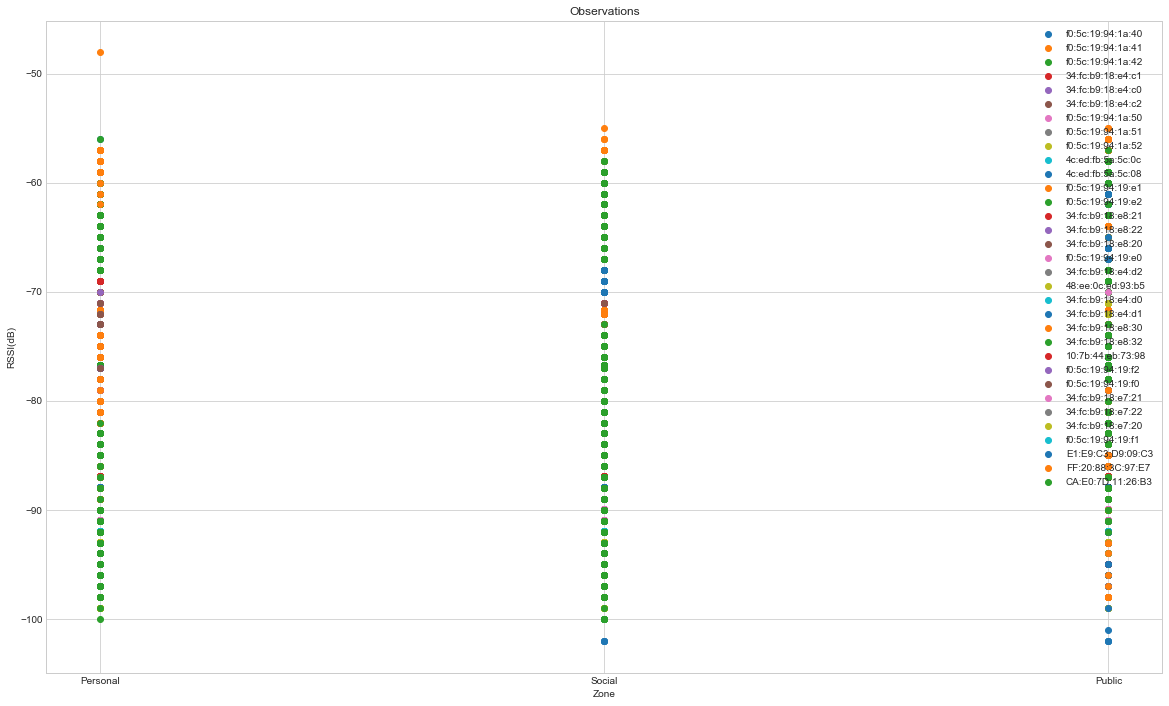

In [24]:
plt.figure(figsize=(20,12))
num = 0
palette = plt.get_cmap('Set1')
for x in X_train:
    num += 1
    plt.scatter(dataset['zone'],dataset[x],label=x,cmap='Sequential')
plt.title('Observations')
plt.xlabel('Zone')  
plt.ylabel('RSSI(dB)')  
plt.legend(loc='upper right');
plt.show()

### Initialize Hyperparameters for tunning

In [26]:
rf_basic = RandomForestClassifier()
print("DEFAULT HYPERPARAMETERS")
default_params = rf_basic.get_params()
display(pd.DataFrame(default_params,index=[1])) 
#Preprocessing options
scaler = [StandardScaler(),MaxAbsScaler(),MinMaxScaler(),None]
# Number of trees in random forest
initial_linespace = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] 
n_estimators = [10,100] + initial_linespace
# Criterion to consider at every split
criterion_metric = ['gini','entropy']
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'rf__n_estimators': n_estimators,
               'rf__criterion': criterion_metric,
               'rf__max_features': max_features,
               'rf__max_depth': max_depth,
               'rf__min_samples_split': min_samples_split,
               'rf__min_samples_leaf': min_samples_leaf,
               'rf__bootstrap': bootstrap}
print(random_grid)

DEFAULT HYPERPARAMETERS


,bootstrap,ccp_alpha,class_weight,criterion,max_depth,max_features,max_leaf_nodes,max_samples,min_impurity_decrease,min_impurity_split,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,n_jobs,oob_score,random_state,verbose,warm_start
1,True,0.0,None,gini,None,auto,None,None,0.0,None,1,2,0.0,100,None,False,None,0,False


{'rf__n_estimators': [10, 100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'rf__criterion': ['gini', 'entropy'], 'rf__max_features': ['auto', 'sqrt', 'log2'], 'rf__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'rf__min_samples_split': [2, 5, 10], 'rf__min_samples_leaf': [1, 2, 4], 'rf__bootstrap': [True, False]}


## Statistics Output Format
Structure of the statistical output of each call to the KNN Regression Function

In [27]:
def structure_data(data,precision,accuracy,f1score):
    mae = data['error'].abs().mean()
    mse = np.power(data['error'],2).mean()
    rsme = np.sqrt(mse)
    precision = precision
    accuracy = accuracy
    f1score = f1score
    statistical_results = [mae,mse,rsme,precision,accuracy,f1score]
    return statistical_results

### Feature Selection 
Check strength of features using ensemble algorithm Random Forest

Feature Selection Computation


array([0.04530774, 0.0528689 , 0.03675165, 0.00607651, 0.00420298,
       0.00463144, 0.03519837, 0.04586518, 0.03705269, 0.10022042,
       0.02692168, 0.07930915, 0.02648368, 0.01175751, 0.00835687,
       0.00508898, 0.01566834, 0.02479083, 0.02240389, 0.02610956,
       0.00796614, 0.02499711, 0.02966416, 0.        , 0.02545626,
       0.00882398, 0.0013156 , 0.00039276, 0.00058848, 0.01424061,
       0.07725821, 0.05434278, 0.13988751])

CA:E0:7D:11:26:B3    0.139888
4c:ed:fb:5a:5c:0c    0.100220
f0:5c:19:94:19:e1    0.079309
E1:E9:C3:D9:09:C3    0.077258
FF:20:88:3C:97:E7    0.054343
f0:5c:19:94:1a:41    0.052869
f0:5c:19:94:1a:51    0.045865
f0:5c:19:94:1a:40    0.045308
f0:5c:19:94:1a:52    0.037053
f0:5c:19:94:1a:42    0.036752
f0:5c:19:94:1a:50    0.035198
34:fc:b9:18:e8:32    0.029664
4c:ed:fb:5a:5c:08    0.026922
f0:5c:19:94:19:e2    0.026484
34:fc:b9:18:e4:d0    0.026110
f0:5c:19:94:19:f2    0.025456
34:fc:b9:18:e8:30    0.024997
34:fc:b9:18:e4:d2    0.024791
48:ee:0c:ed:93:b5    0.022404
f0:5c:19:94:19:e0    0.015668
f0:5c:19:94:19:f1    0.014241
34:fc:b9:18:e8:21    0.011758
f0:5c:19:94:19:f0    0.008824
34:fc:b9:18:e8:22    0.008357
34:fc:b9:18:e4:d1    0.007966
34:fc:b9:18:e4:c1    0.006077
34:fc:b9:18:e8:20    0.005089
34:fc:b9:18:e4:c2    0.004631
34:fc:b9:18:e4:c0    0.004203
34:fc:b9:18:e7:21    0.001316
34:fc:b9:18:e7:20    0.000588
34:fc:b9:18:e7:22    0.000393
10:7b:44:eb:73:98    0.000000
dtype: flo

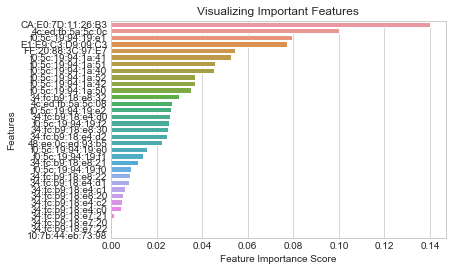

In [28]:
print("Feature Selection Computation")
random_forest_estimator = RandomForestClassifier()
main_estimator = make_pipeline(StandardScaler(),random_forest_estimator)
main_estimator.fit(X_train,train_Y.ravel())
display(random_forest_estimator.feature_importances_)
feature_imp = pd.Series(random_forest_estimator.feature_importances_,index=X_train.columns).sort_values(ascending=False)
display(feature_imp)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## Model Training and Evaluation - RF Classification Model

In [29]:
def compute_RF_Classification(flag=0,
                              trainX_data = None, trainY_data = None,
                              testX_data = None,testY_data = None, 
                              scaler = None,cross_validation = None,
                              n_estimators_parameter = 100, criterion_parameter = 'gini',
                              max_depth_parameter = None,min_samples_split_parameter = 2,
                              min_samples_leaf_parameter = 1,max_features_parameter = 'auto',
                              bootstrap_parameter = True, random_state_parameter = 6):
    random_forest_estimator = RandomForestClassifier(n_estimators=n_estimators_parameter,criterion=criterion_parameter,
                                                    max_features=max_features_parameter,max_depth=max_depth_parameter,
                                                    min_samples_leaf=min_samples_leaf_parameter,min_samples_split=min_samples_split_parameter,
                                                    bootstrap=bootstrap_parameter,random_state=random_state_parameter)
    if scaler is not None:
        # Make pipeline using scaler transformation
        main_estimator = make_pipeline(scaler,random_forest_estimator)
    else:
        main_estimator = random_forest_estimator
    if cross_validation is None:
        # Fit the training data
        main_estimator.fit(trainX_data,trainY_data)
        # Predict the results of the testing data features
        predict_test = main_estimator.predict(testX_data)
        matrix = confusion_matrix(testY_data, predict_test)
        report = classification_report(testY_data, predict_test,output_dict=True)
        accuracy = accuracy_score(testY_data,predict_test)
    else:
        predict_test = cross_val_predict(main_estimator,testX_data,testY_data,cv = cross_validation)
        matrix = confusion_matrix(testY_data, predict_test)
        report = classification_report(testY_data, predict_test,output_dict=True)
        accuracy = accuracy_score(testY_data,predict_test)
    # Structure data to statistics
    statistical_array = list()
    statistics = pd.DataFrame(report).transpose()
    error_dataframe = pd.DataFrame({'Actual': testY_data.flatten(), 'Predicted':predict_test.flatten()})
    if flag == 1:
        print("Confusion Matrix:")
        print(matrix)
        display(statistics)
        display(error_dataframe)
        error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
    error = pd.DataFrame(np.where(error_dataframe['Actual'] != error_dataframe['Predicted'],1,0), columns=["error"])
    result = pd.DataFrame(train_Y,columns=["zone"]).join(error)
    return structure_data(result,statistics['precision'].mean(),accuracy,statistics['f1-score'].mean())

## Experiments

### Check Training model with no cross validation
Use RF Classifier to check the results on the training data alone

Confusion Matrix:
[[150   0   0]
 [  0 150   0]
 [  0   0 450]]


,precision,recall,f1-score,support
0,1.0,1.0,1.0,150.0
1,1.0,1.0,1.0,150.0
2,1.0,1.0,1.0,450.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,750.0
weighted avg,1.0,1.0,1.0,750.0


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
745,0,0
746,0,0
747,0,0
748,0,0


Confusion Matrix:
[[144   0   6]
 [  0 147   3]
 [  4   6 440]]


,precision,recall,f1-score,support
0,0.972973,0.960000,0.966443,150.000000
1,0.960784,0.980000,0.970297,150.000000
2,0.979955,0.977778,0.978865,450.000000
accuracy,0.974667,0.974667,0.974667,0.974667
macro avg,0.971238,0.972593,0.971868,750.000000
weighted avg,0.974725,0.974667,0.974667,750.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
745,0,0
746,0,0
747,0,0
748,0,0


Confusion Matrix:
[[150   0   0]
 [  0 150   0]
 [  0   0 450]]


,precision,recall,f1-score,support
0,1.0,1.0,1.0,150.0
1,1.0,1.0,1.0,150.0
2,1.0,1.0,1.0,450.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,750.0
weighted avg,1.0,1.0,1.0,750.0


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
745,0,0
746,0,0
747,0,0
748,0,0


,mae,mse,rmse,precision,accuracy,f1-score,type
0,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000,WiFi
2,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000,Both
1,0.025333,0.025333,0.159164,0.97239,0.974667,0.972801,BLE


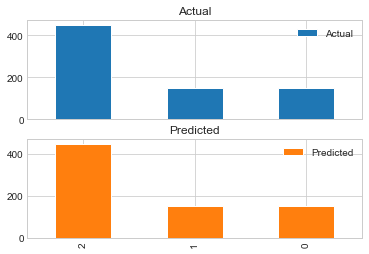

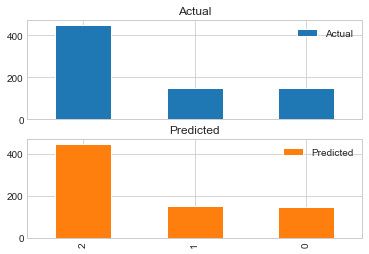

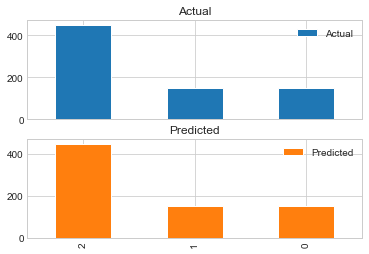

In [30]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    result = compute_RF_Classification(flag=1,trainX_data=trainX_data,trainY_data=train_Y.ravel(),
                                   testX_data=trainX_data,testY_data=train_Y.ravel(),
                                   scaler=StandardScaler())
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))

### Experiment - RF with StratifiedKFold
Experiment using cross validation approach of StratifiedKFold

,mae,mse,rmse,precision,accuracy,f1-score,folds,type
23,0.062667,0.062667,0.250333,0.933105,0.937333,0.932638,7,Both
26,0.069333,0.069333,0.263312,0.928402,0.930667,0.925696,10,Both
24,0.073333,0.073333,0.270801,0.918302,0.926667,0.922845,8,Both
22,0.078667,0.078667,0.280476,0.916459,0.921333,0.915515,6,Both
25,0.088000,0.088000,0.296648,0.902842,0.912000,0.908466,9,Both
5,0.093333,0.093333,0.305505,0.900545,0.906667,0.899152,7,WiFi
6,0.098667,0.098667,0.314113,0.890164,0.901333,0.895278,8,WiFi
7,0.118667,0.118667,0.344480,0.872512,0.881333,0.877478,9,WiFi
8,0.117333,0.117333,0.342540,0.871375,0.882667,0.874729,10,WiFi
4,0.164000,0.164000,0.404969,0.818645,0.836000,0.825700,6,WiFi


Number of Folds:  7


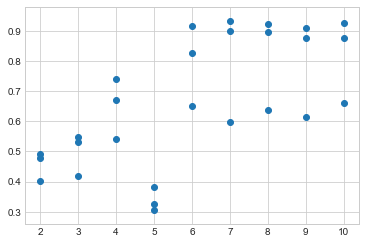

In [31]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','folds','type']
types = ['WiFi','BLE','Both']
cross_validation_list = np.arange(2,11)
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    for cv in cross_validation_list:
        result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = cv)  
        result.append(cv)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['folds'],statistics['f1-score'])
selected_fold = statistics.sort_values(by=['f1-score'],ascending=False)['folds'].head(1).values[0]
print("Number of Folds: ",selected_fold)

### Experiment - RF with HoldOut
Experiment using cross validation approach of HoldOut (Train test split)

,mae,mse,rmse,precision,accuracy,f1-score,test_size,type
18,0.013333,0.013333,0.115470,0.981806,0.986667,0.985914,0.1,Both
19,0.013333,0.013333,0.115470,0.990773,0.986667,0.985425,0.2,Both
20,0.017778,0.017778,0.133333,0.987764,0.982222,0.980717,0.3,Both
22,0.018667,0.018667,0.136626,0.984832,0.981333,0.979594,0.5,Both
21,0.023333,0.023333,0.152753,0.981177,0.976667,0.974679,0.4,Both
23,0.024444,0.024444,0.156347,0.981370,0.975556,0.973439,0.6,Both
0,0.026667,0.026667,0.163299,0.972423,0.973333,0.971339,0.1,WiFi
1,0.026667,0.026667,0.163299,0.975921,0.973333,0.970849,0.2,WiFi
24,0.034286,0.034286,0.185164,0.973399,0.965714,0.962606,0.7,Both
2,0.035556,0.035556,0.188562,0.971993,0.964444,0.961235,0.3,WiFi


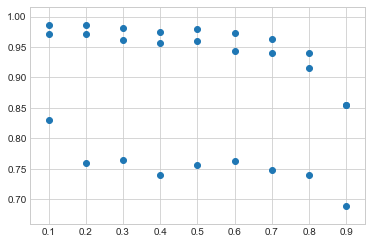

In [32]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','test_size','type']
test_sizes =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for size in test_sizes:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = size, random_state = 42,stratify=train_Y)
        result = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler())
        result.append(size)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['test_size'],statistics['f1-score'])

### Experiment - RF with Leave One Group Out
Experiment using cross validation approach of Leave One Group Out

In [33]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','type']
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
    result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited)  
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))

,mae,mse,rmse,precision,accuracy,f1-score,type
0,1.0,1.0,1.0,0.0,0.0,0.0,WiFi
1,1.0,1.0,1.0,0.0,0.0,0.0,BLE
2,1.0,1.0,1.0,0.0,0.0,0.0,Both


### Evaluation Model Cross-Validation Experiment - Best cross-validation technique
Best parameters found using RF

,mae,mse,rmse,precision,accuracy,f1-score,method,type
7,0.017778,0.017778,0.133333,0.987764,0.982222,0.980717,HoldOut,Both
1,0.035556,0.035556,0.188562,0.971993,0.964444,0.961235,HoldOut,WiFi
8,0.062667,0.062667,0.250333,0.933105,0.937333,0.932638,Stratified K-Fold,Both
2,0.093333,0.093333,0.305505,0.900545,0.906667,0.899152,Stratified K-Fold,WiFi
4,0.217778,0.217778,0.466667,0.769538,0.782222,0.765069,HoldOut,BLE
5,0.382667,0.382667,0.618601,0.591428,0.617333,0.597757,Stratified K-Fold,BLE
0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,LOO,WiFi
3,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,LOO,BLE
6,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,LOO,Both


Selected cross validation method:  HoldOut


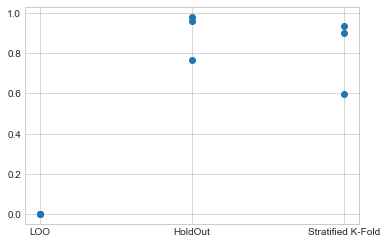

In [34]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','method','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3, random_state = 42,stratify=train_Y)
    holdout = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler())
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
    loo = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited)  
    loo.append('LOO')
    loo.append(feature)
    results.append(loo)
    holdout.append('HoldOut')
    holdout.append(feature)
    results.append(holdout)
    skfold = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = selected_fold)
    skfold.append('Stratified K-Fold')
    skfold.append(feature)
    results.append(skfold)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['method'],statistics['f1-score'],'o')
selected_method = "HoldOut"
print("Selected cross validation method: ",selected_method)

### Experiment - Best preprocessing technique
Experiment with the different preprocessing techniques

,mae,mse,rmse,precision,accuracy,f1-score,preprocessing,preprocessingFunc,type
8,0.017778,0.017778,0.133333,0.987764,0.982222,0.980717,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",Both
9,0.017778,0.017778,0.133333,0.987764,0.982222,0.980717,MaxAbsScaler,MaxAbsScaler(copy=True),Both
10,0.017778,0.017778,0.133333,0.987764,0.982222,0.980717,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",Both
11,0.017778,0.017778,0.133333,0.987764,0.982222,0.980717,None,None,Both
0,0.035556,0.035556,0.188562,0.971993,0.964444,0.961235,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",WiFi
1,0.035556,0.035556,0.188562,0.972134,0.964444,0.961232,MaxAbsScaler,MaxAbsScaler(copy=True),WiFi
3,0.035556,0.035556,0.188562,0.972134,0.964444,0.961232,None,None,WiFi
2,0.040000,0.040000,0.200000,0.969095,0.960000,0.956291,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",WiFi
6,0.208889,0.208889,0.457044,0.777831,0.791111,0.775780,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",BLE
7,0.208889,0.208889,0.457044,0.777831,0.791111,0.775780,None,None,BLE


Selected Preprocessing:  StandardScaler


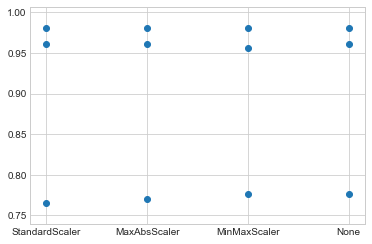

In [37]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','preprocessing','preprocessingFunc','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train  
    for preprocess in scaler:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=preprocess,cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=preprocess,cross_validation = selected_fold)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3, random_state = 42,stratify=train_Y)
            result = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=preprocess)
        if(preprocess is None):
            regex = 'None'
        else:
            regex = re.search('(\w+)\(',str(preprocess)).group(1)
        result.append(regex)
        result.append(preprocess)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['preprocessing'],statistics['f1-score'])
selected_preprocessing = statistics.sort_values(by=['f1-score'],ascending=False)['preprocessing'].head(1).values[0]
selected_preprocesssing_func = statistics.sort_values(by=['f1-score'],ascending=False)['preprocessingFunc'].head(1).values[0]
print("Selected Preprocessing: ",selected_preprocessing)

#### Experiment - Running the RF function with the different number of decision trees

,mae,mse,rmse,precision,accuracy,f1-score,n_estimator,type
25,0.017778,0.017778,0.133333,0.987764,0.982222,0.980717,100,Both
34,0.017778,0.017778,0.133333,0.984038,0.982222,0.980682,1800,Both
27,0.017778,0.017778,0.133333,0.984038,0.982222,0.980682,400,Both
28,0.017778,0.017778,0.133333,0.984038,0.982222,0.980682,600,Both
29,0.017778,0.017778,0.133333,0.984038,0.982222,0.980682,800,Both
30,0.017778,0.017778,0.133333,0.984038,0.982222,0.980682,1000,Both
31,0.017778,0.017778,0.133333,0.984038,0.982222,0.980682,1200,Both
32,0.017778,0.017778,0.133333,0.984038,0.982222,0.980682,1400,Both
33,0.017778,0.017778,0.133333,0.984038,0.982222,0.980682,1600,Both
35,0.017778,0.017778,0.133333,0.984038,0.982222,0.980682,2000,Both


Selected Estimator Size:  100


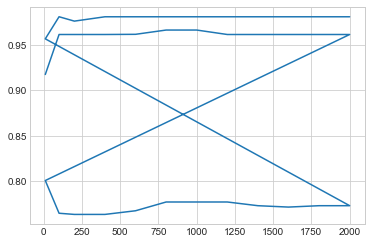

In [38]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','n_estimator','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    for n in n_estimators:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(X_train,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited,
                                n_estimators_parameter=n)  
        elif selected_method =='Stratified K-Fold':
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                 n_estimators_parameter=n)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3,
                                                                                        random_state = 42,stratify=train_Y)
            result = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                 scaler=StandardScaler(), n_estimators_parameter=n)
        result.append(n)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['n_estimator'],statistics['f1-score'])
selected_estimator_size = statistics.sort_values(by=['f1-score'],ascending=False)['n_estimator'].head(1).values[0]
print("Selected Estimator Size: ",selected_estimator_size)

#### Experiment - Running the RF function with the different criterias

,mae,mse,rmse,precision,accuracy,f1-score,criterion,type
4,0.017778,0.017778,0.133333,0.987764,0.982222,0.980717,gini,Both
5,0.022222,0.022222,0.149071,0.980872,0.977778,0.975708,entropy,Both
1,0.031111,0.031111,0.176383,0.974921,0.968889,0.966118,entropy,WiFi
0,0.035556,0.035556,0.188562,0.971993,0.964444,0.961235,gini,WiFi
3,0.213333,0.213333,0.461880,0.773423,0.786667,0.768603,entropy,BLE
2,0.217778,0.217778,0.466667,0.769538,0.782222,0.765069,gini,BLE


Selected Criterion:  gini


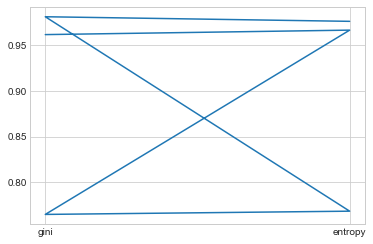

In [40]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','criterion','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    for metric in criterion_metric:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(X_train,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited,
                                criterion_parameter=metric)  
        elif selected_method =='Stratified K-Fold':
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                 criterion_parameter=metric)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3,
                                                                                        random_state = 42,stratify=train_Y)
            result = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                 scaler=StandardScaler(), criterion_parameter=metric)
        result.append(metric)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['criterion'],statistics['f1-score'])
selected_criterion = statistics.sort_values(by=['f1-score'],ascending=False)['criterion'].head(1).values[0]
print("Selected Criterion: ",selected_criterion)

#### Experiment - Running the RF function with the different max_features

,mae,mse,rmse,precision,accuracy,f1-score,max_feature,type
6,0.017778,0.017778,0.133333,0.987764,0.982222,0.980717,auto,Both
7,0.017778,0.017778,0.133333,0.987764,0.982222,0.980717,sqrt,Both
8,0.017778,0.017778,0.133333,0.987764,0.982222,0.980717,log2,Both
0,0.035556,0.035556,0.188562,0.971993,0.964444,0.961235,auto,WiFi
1,0.035556,0.035556,0.188562,0.971993,0.964444,0.961235,sqrt,WiFi
2,0.040000,0.040000,0.200000,0.968947,0.960000,0.956222,log2,WiFi
3,0.217778,0.217778,0.466667,0.769538,0.782222,0.765069,auto,BLE
4,0.217778,0.217778,0.466667,0.769538,0.782222,0.765069,sqrt,BLE
5,0.217778,0.217778,0.466667,0.769538,0.782222,0.765069,log2,BLE


Selected max_feature:  auto


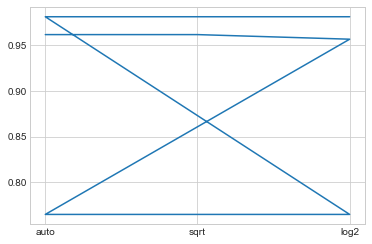

In [41]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','max_feature','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    for max_feature in max_features:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(X_train,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited,
                                max_features_parameter=max_feature)  
        elif selected_method =='Stratified K-Fold':
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                 max_features_parameter=max_feature)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3,
                                                                                        random_state = 42,stratify=train_Y)
            result = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                 scaler=StandardScaler(), max_features_parameter=max_feature)
        result.append(max_feature)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['max_feature'],statistics['f1-score'])
selected_max_feature = statistics.sort_values(by=['f1-score'],ascending=False)['max_feature'].head(1).values[0]
print("Selected max_feature: ",selected_max_feature)

#### Experiment - Running the RF function with the different max_depth metric

,mae,mse,rmse,precision,accuracy,f1-score,max_depth,type
35,0.017778,0.017778,0.133333,0.987764,0.982222,0.980717,NaN,Both
34,0.017778,0.017778,0.133333,0.987764,0.982222,0.980717,110.0,Both
26,0.017778,0.017778,0.133333,0.987764,0.982222,0.980717,30.0,Both
27,0.017778,0.017778,0.133333,0.987764,0.982222,0.980717,40.0,Both
28,0.017778,0.017778,0.133333,0.987764,0.982222,0.980717,50.0,Both
29,0.017778,0.017778,0.133333,0.987764,0.982222,0.980717,60.0,Both
30,0.017778,0.017778,0.133333,0.987764,0.982222,0.980717,70.0,Both
31,0.017778,0.017778,0.133333,0.987764,0.982222,0.980717,80.0,Both
32,0.017778,0.017778,0.133333,0.987764,0.982222,0.980717,90.0,Both
33,0.017778,0.017778,0.133333,0.987764,0.982222,0.980717,100.0,Both


Selected max_depth:  nan


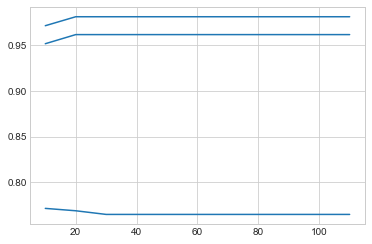

In [42]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','max_depth','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    for depth in max_depth:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(X_train,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited,
                                max_depth_parameter=depth)  
        elif selected_method =='Stratified K-Fold':
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                 max_depth_parameter=depth)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3,
                                                                                        random_state = 42,stratify=train_Y)
            result = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                 scaler=StandardScaler(), max_depth_parameter=depth)
        result.append(depth)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['max_depth'],statistics['f1-score'])
selected_max_depth = statistics.sort_values(by=['f1-score'],ascending=False)['max_depth'].head(1).values[0]
print("Selected max_depth: ",selected_max_depth)

#### Experiment: Running the RF function with the different min_samples_split metric

,mae,mse,rmse,precision,accuracy,f1-score,min_samples_split,type
6,0.017778,0.017778,0.133333,0.987764,0.982222,0.980717,2,Both
7,0.022222,0.022222,0.149071,0.981013,0.977778,0.975907,5,Both
8,0.026667,0.026667,0.163299,0.978286,0.973333,0.970934,10,Both
0,0.035556,0.035556,0.188562,0.971993,0.964444,0.961235,2,WiFi
2,0.048889,0.048889,0.221108,0.963086,0.951111,0.946216,10,WiFi
1,0.048889,0.048889,0.221108,0.963391,0.951111,0.946207,5,WiFi
4,0.208889,0.208889,0.457044,0.778698,0.791111,0.772657,5,BLE
3,0.217778,0.217778,0.466667,0.769538,0.782222,0.765069,2,BLE
5,0.213333,0.213333,0.461880,0.775103,0.786667,0.764962,10,BLE


Selected min_samples_split:  2


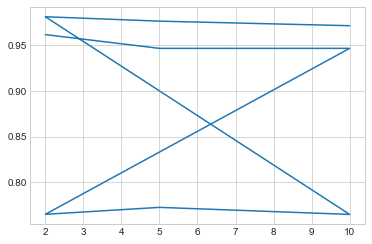

In [43]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','min_samples_split','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    for s in min_samples_split:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(X_train,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited,
                                min_samples_split_parameter=s)  
        elif selected_method =='Stratified K-Fold':
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                 min_samples_split_parameter=s)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3,
                                                                                        random_state = 42,stratify=train_Y)
            result = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                 scaler=StandardScaler(), min_samples_split_parameter=s)
        result.append(s)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['min_samples_split'],statistics['f1-score'])
selected_min_samples_split = statistics.sort_values(by=['f1-score'],ascending=False)['min_samples_split'].head(1).values[0]
print("Selected min_samples_split: ",selected_min_samples_split)

#### Experiment: Running the RF function with the different min_samples_leaf metric

,mae,mse,rmse,precision,accuracy,f1-score,min_samples_leaf,type
6,0.017778,0.017778,0.133333,0.987764,0.982222,0.980717,1,Both
7,0.031111,0.031111,0.176383,0.978931,0.968889,0.965973,2,Both
0,0.035556,0.035556,0.188562,0.971993,0.964444,0.961235,1,WiFi
8,0.035556,0.035556,0.188562,0.972134,0.964444,0.961232,4,Both
1,0.048889,0.048889,0.221108,0.959543,0.951111,0.946599,2,WiFi
2,0.062222,0.062222,0.249444,0.947186,0.937778,0.929830,4,WiFi
4,0.200000,0.200000,0.447214,0.790279,0.800000,0.781180,2,BLE
5,0.204444,0.204444,0.452155,0.791551,0.795556,0.769724,4,BLE
3,0.217778,0.217778,0.466667,0.769538,0.782222,0.765069,1,BLE


Selected min_samples_leaf:  1


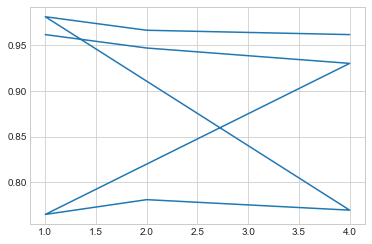

In [44]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','min_samples_leaf','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    for leaf in min_samples_leaf:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(X_train,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited,
                                min_samples_leaf_parameter=leaf)  
        elif selected_method =='Stratified K-Fold':
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                 min_samples_leaf_parameter=leaf)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3,
                                                                                        random_state = 42,stratify=train_Y)
            result = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                 scaler=StandardScaler(), min_samples_leaf_parameter=leaf)
        result.append(leaf)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['min_samples_leaf'],statistics['f1-score'])
selected_min_samples_leaf = statistics.sort_values(by=['f1-score'],ascending=False)['min_samples_leaf'].head(1).values[0]
print("Selected min_samples_leaf: ",selected_min_samples_leaf)

### Run RandomizedSearchCV for parameter tunning

In [ ]:
types = ['WiFi','BLE','Both']
results = list()
scores = ['f1_macro']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    for feature in types:
        #Decide on type of data
        if feature == 'WiFi':
            trainX_data = train_wifi
        elif feature == 'BLE':
            trainX_data = train_ble
        else:
            trainX_data = X_train 
        pipe = Pipeline([('standardizer', StandardScaler()), ('rf', RandomForestClassifier())])
        clf = RandomizedSearchCV(pipe,param_distributions  = random_grid,n_iter=75,cv=selected_fold,scoring=score,verbose=1,n_jobs=-1
        )
        clf.fit(trainX_data,train_Y.ravel())
        clf.best_params_['score'] = score
        clf.best_params_['best_score'] = clf.best_score_
        clf.best_params_['type'] = feature
        results.append(clf.best_params_)
gridcv_results = pd.DataFrame(results).sort_values(by=['best_score'],ascending=False)
display(gridcv_results)

### Best Parameters
Display the best parameters tunned throughout the experiments

In [ ]:
conclusion_cols=['Cross_Validation','Number of Estimators','Max Features','Max Depth','Criterion','Min_Samples_Leaf','Min_Samples_Split','Preprocessing']
conclusion_list = [selected_method,selected_estimator_size,selected_max_feature,selected_max_depth,selected_criterion,
                   selected_min_samples_leaf,selected_min_samples_split,selected_preprocessing]
conclusion_pd = pd.DataFrame([conclusion_list],columns= conclusion_cols)
display(conclusion_pd)

### Best Results

In [ ]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','type']
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    if selected_method == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
        result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited,
                            n_estimators_parameter=estimators,criterion_parameter=criterion,
                                          max_depth_parameter=depth, max_features_parameter=max_feat,
                                          min_samples_leaf_parameter=min_samples_leaf,
                                          min_samples_split_parameter=min_samples_spli  
    elif selected_method =='Stratified K-Fold':
        result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = selected_fold,
                            n_estimators_parameter=estimators,criterion_parameter=criterion,
                                          max_depth_parameter=depth, max_features_parameter=max_feat,
                                          min_samples_leaf_parameter=min_samples_leaf,
                                          min_samples_split_parameter=min_samples_spli  
    else:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3, random_state = 42,stratify=train_Y)
        result = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                             scaler=StandardScaler(),n_estimators_parameter=estimators,criterion_parameter=criterion,
                                          max_depth_parameter=depth, max_features_parameter=max_feat,
                                          min_samples_leaf_parameter=min_samples_leaf,
                                          min_samples_split_parameter=min_samples_split)
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))